In [1]:
# general lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# -> nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# -> sklearn for preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# -> sklearn Models
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB

# -> Tensorflow
from tensorflow.keras.layers import Dense, LSTM, Embedding, SimpleRNN, Conv2D, MaxPooling2D, Bidirectional
from tensorflow.keras import Sequential


In [7]:
pd.read_excel(r'C:\Users\VAIBHAV\Desktop\Data Science\ds_csv\Canada.xlsx')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,International Migration Flows to and from Sele...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,POP/DB/MIG/Flow/Rev.2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


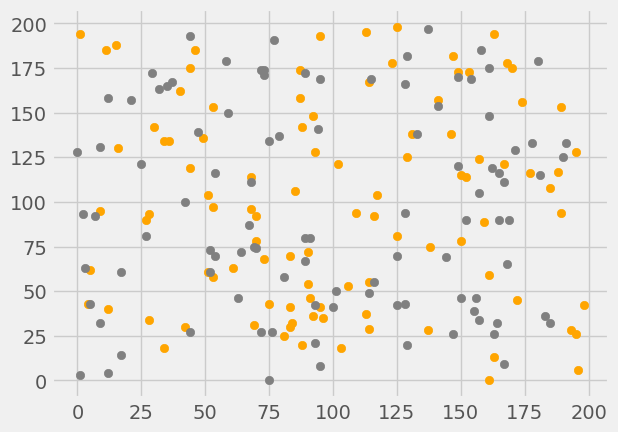

In [52]:
plt.style.use('fivethirtyeight')
plt.scatter(np.random.randint(0,200,100),np.random.randint(0,200,100),color='orange',marker='o')
plt.scatter(np.random.randint(0,200,100),np.random.randint(0,200,100),color='grey',marker='o')

In [53]:
df = pd.read_csv('ds_csv/Bengaluru_House_Data.csv')

In [54]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [55]:
df['bath'] = df['bath'].fillna(value=df['bath'].mean())

In [56]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony          609
price              0
dtype: int64

In [57]:
df.describe()

,bath,balcony,price
count,13320.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.337777,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [58]:
temp = df[['bath','price','balcony']]

In [59]:
temp.corr()

,bath,price,balcony
bath,1.000000,0.455397,0.204201
price,0.455397,1.000000,0.120355
balcony,0.204201,0.120355,1.000000


In [60]:
data = {
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Value': [10, 20, 15, 25, 30]
}
df = pd.DataFrame(data)
df

,Category,Value
0,A,10
1,B,20
2,A,15
3,B,25
4,A,30


In [61]:
df.groupby('Category').count().reset_index()

,Category,Value
0,A,3
1,B,2


In [62]:
import numpy as np

# Create a sample NumPy array
arr = np.array([1, 2, 3, 4, np.nan, np.inf, -np.inf, 0j, 2j])

# any(): Checks if any element is True (non-zero)
print("Any True element:", np.any(arr))

# all(): Checks if all elements are True (non-zero)
print("All True elements:", np.all(arr))

# isnan(): Checks for NaN (Not a Number) values
print("NaN values:", np.isnan(arr))

# isinf(): Checks for infinity values
print("Infinity values:", np.isinf(arr))

# isfinite(): Checks for finite values
print("Finite values:", np.isfinite(arr))

# zeros(): Creates an array of zeros with the same shape as the input
zeros_arr = np.zeros_like(arr)
print("Array of zeros:", zeros_arr)

# isreal(): Checks for real numbers
print("Real numbers:", np.isreal(arr))

# iscomplex(): Checks for complex numbers
print("Complex numbers:", np.iscomplex(arr))

# isscalar(): Checks if the array is a scalar
print("Is scalar:", np.isscalar(arr[0]))

# Comparison operations
print("Less than 3:", arr < 3)
print("Greater than 2:", arr > 2)
print("Less than or equal to 3:", arr <= 3)
print("Greater than or equal to 2:", arr >= 2)


Any True element: True
All True elements: False
NaN values: [False False False False  True False False False False]
Infinity values: [False False False False False  True  True False False]
Finite values: [ True  True  True  True False False False  True  True]
Array of zeros: [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Real numbers: [ True  True  True  True  True  True  True  True False]
Complex numbers: [False False False False False False False False  True]
Is scalar: True
Less than 3: [ True  True False False False False  True  True  True]
Greater than 2: [False False  True  True False  True False False False]
Less than or equal to 3: [ True  True  True False False False  True  True  True]
Greater than or equal to 2: [False  True  True  True False  True False False False]


C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_7028\672784754.py:35: RuntimeWarning: invalid value encountered in less
  print("Less than 3:", arr < 3)
C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_7028\672784754.py:36: RuntimeWarning: invalid value encountered in greater
  print("Greater than 2:", arr > 2)
C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_7028\672784754.py:37: RuntimeWarning: invalid value encountered in less_equal
  print("Less than or equal to 3:", arr <= 3)
C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_7028\672784754.py:38: RuntimeWarning: invalid value encountered in greater_equal
  print("Greater than or equal to 2:", arr >= 2)


<BarContainer object of 6 artists>

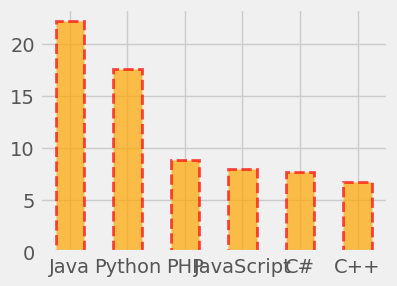

In [63]:
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
y = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
plt.figure(figsize=(4, 3))
plt.bar(x, y,color='orange',width=0.5,align='center',edgecolor='red',linewidth=2,alpha=0.7,linestyle='--',label='bar',visible=True)

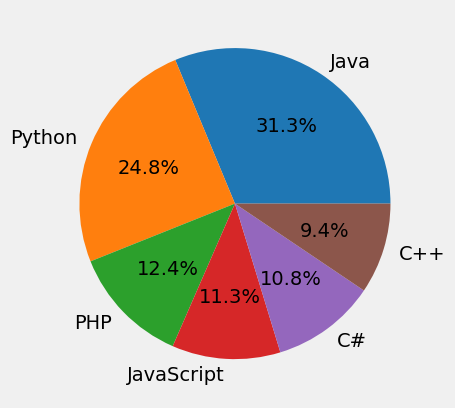

In [64]:
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
y = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
"#9467bd", "#8c564b"]
plt.pie(x=y,labels=x,colors=colors,autopct='%1.1f%%')
plt.show()